This example is a modification of [this sklearn example](http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html)

Anomaly detection algorithms return 1 for inliers and -1 for outliers.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

rng = np.random.RandomState(42)

Settings

In [0]:
n_samples = 200
outliers_fraction = 0.1
offset = 2

Preparing the labels

In [0]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1

Generating the simulated data, including the clusters and the outliers.

[*np.r_* and *np.c_*](https://docs.scipy.org/doc/numpy/reference/routines.indexing.html) are special concatenation methods in numpy along the 1st and 2nd axes respectively.

In [0]:
cluster1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
cluster2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
outliers = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))

X = np.r_[cluster1, cluster2, outliers]

Preliminary visualization of the data

(-7, 7)

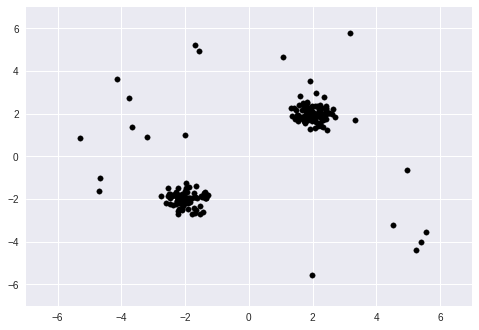

In [5]:
ax = plt.subplot(1, 1, 1)
ax.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], 
           c='black', s=30, edgecolor='k')
ax.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], 
           c='black', s=30, edgecolor='k')
ax.set_xlim((-7, 7))
ax.set_ylim((-7, 7))

# Isolation Forest

Prerequisites

* Decision tree
* Random Forest
* Extreme randomized tree
* Anomaly score

[Sklearn user guide](http://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest)

[Nice blog entry by Towards Data Science](https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e)

In [0]:
clf = IsolationForest(max_samples=n_samples,
                      contamination=outliers_fraction,
                      random_state=rng)

In [7]:
clf.fit(X)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=200, n_estimators=100, n_jobs=1,
        random_state=<mtrand.RandomState object at 0x7f44c8bcb7d0>,
        verbose=0)

During fitting, the threshold is calculated.

In [8]:
clf.threshold_

0.006158638905004947

Understanding the difference between *predict()* and *decision_function()*.

In [9]:
y_pred = clf.predict(X)
y_pred[::10]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1])

In [10]:
scores_pred = clf.decision_function(X)
scores_pred[::10]

array([ 0.03604533,  0.07015665,  0.00847164,  0.12204708,  0.13068037,
        0.11368053,  0.09413899,  0.03672754,  0.01566669,  0.11789282,
        0.04889773,  0.02774449,  0.13469875,  0.12715783,  0.06944203,
        0.11309846,  0.09755856,  0.10311902, -0.12872499, -0.13455325])

Visualize results with [plt.contour() and plt.contourf()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html).

Prepare the 2-D axes with [np.meshgrid()][mg].

Flatten the data using [np.ravel()][ravel].

[mg]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html "np.meshgrisd API"
[ravel]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html

In [0]:
xx1, xx2 = np.meshgrid(np.linspace(-7, 7, 100), 
                       np.linspace(-7, 7, 100))

Z = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

(-7, 7)

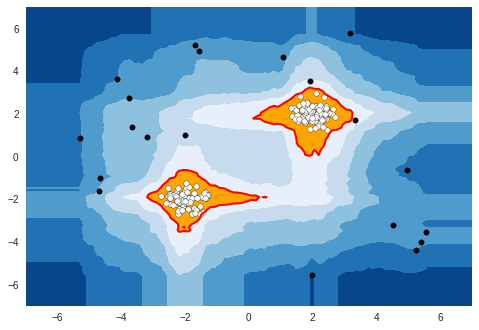

In [12]:
ax = plt.subplot(1, 1, 1)
# Background colors
ax.contourf(xx1, xx2, Z, 
            levels=np.linspace(Z.min(), clf.threshold_, 7),
            cmap=plt.cm.Blues_r)
# Threshold contour
a = ax.contour(xx1, xx2, Z, 
               levels=[clf.threshold_],
               linewidths=2, colors='red')
# Inliers coloring
ax.contourf(xx1, xx2, Z, 
            levels=[clf.threshold_, Z.max()],
            colors='orange')
# Inliers scatter
b = ax.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1],
               c='white', s=30, edgecolor='k')
# Outliers scatter
c = ax.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], 
               c='black', s=30, edgecolor='k')
ax.set_xlim((-7, 7))
ax.set_ylim((-7, 7))

# Local Outlier Factor (LOF)

Prerequisites

* k-NN
* LOF score

[LOF - Wikipedia](https://en.wikipedia.org/wiki/Local_outlier_factor)

In [0]:
clf = LocalOutlierFactor(n_neighbors=35,
                         contamination=outliers_fraction)

In [14]:
clf.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=35,
          p=2)

In [15]:
y_pred = clf.fit_predict(X)
y_pred[::10]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1])

In [16]:
scores_pred = clf.negative_outlier_factor_
scores_pred[::10]

array([ -1.626155  ,  -1.27356621,  -1.63352504,  -0.97917479,
        -0.96010604,  -1.00036954,  -1.11452695,  -1.54661087,
        -1.70872572,  -1.00298327,  -1.25155544,  -1.51849569,
        -0.9454615 ,  -0.96434506,  -1.27297133,  -1.02109343,
        -1.10803481,  -1.05158716, -11.68371998,  -7.34219854])

In [17]:
clf.threshold_

-1.7708041090889124

In [0]:
xx1, xx2 = np.meshgrid(np.linspace(-7, 7, 100), 
                       np.linspace(-7, 7, 100))

Z = clf._decision_function(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

(-7, 7)

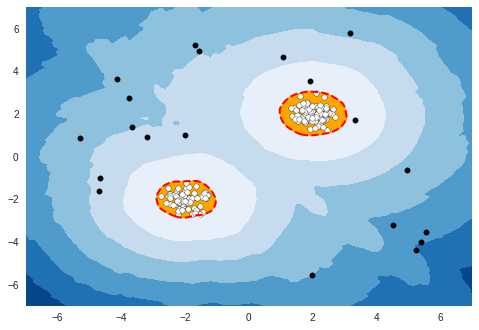

In [19]:
ax = plt.subplot(1, 1, 1)
# Background colors
ax.contourf(xx1, xx2, Z, 
            levels=np.linspace(Z.min(), clf.threshold_, 7),
            cmap=plt.cm.Blues_r)
# Threshold contour
a = ax.contour(xx1, xx2, Z, 
               levels=[clf.threshold_],
               linewidths=2, colors='red')
# Inliers coloring
ax.contourf(xx1, xx2, Z, 
            levels=[clf.threshold_, Z.max()],
            colors='orange')
# Inliers scatter
b = ax.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1],
               c='white', s=30, edgecolor='k')
# Outliers scatter
c = ax.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], 
               c='black', s=30, edgecolor='k')
ax.set_xlim((-7, 7))
ax.set_ylim((-7, 7))